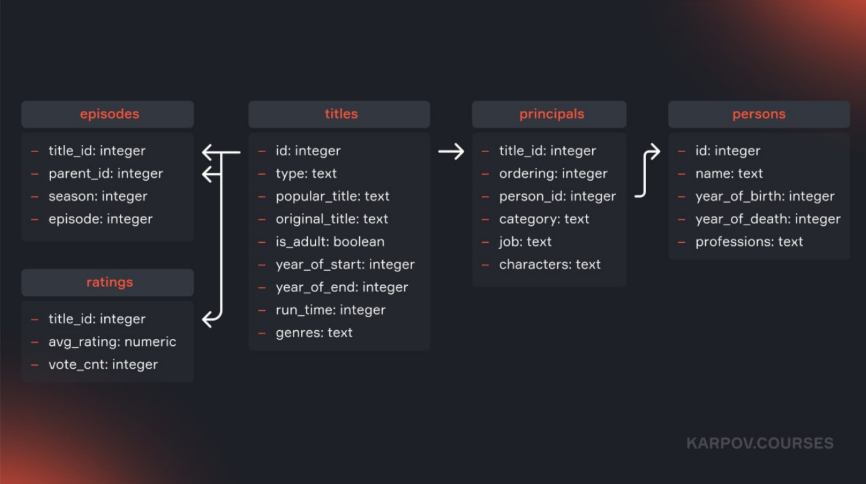

Задание 1  
Напишите SQL-запрос, который выведет названия (name) сериалов, у которых первый эпизод первого сезона получил рейтинг 10. Назовите результирующее поле name. Для выборки используйте таблицы titles, ratings, episodes и коррелированные подзапросы. Результат отсортируйте в лексикографическом порядке.

In [ ]:
SELECT e.employee_id,
       m.name as manager_name,
       e.name
FROM   employees as e
    LEFT JOIN employees as m
        ON e.manager_id = m.employee_id
ORDER BY e.employee_id;

Задание 2  
Напишите SQL-запрос, который выведет оригинальное название (original_title), год начала (year_of_start) и количество эпизодов произведений, у которых больше 500 серий, отсортировав их по убыванию количества серий. Для этого используйте подзапрос к таблице episodes с группировкой по полю parent_id. Выведите только строки, которые есть в таблице titles и в сгруппированной таблице.  
Назовите поле с количеством эпизодов произведений ep_cnt. Отсортируйте результат по этому полю в порядке убывания.

In [ ]:
SELECT t.original_title,
       t.year_of_start,
       ep_count.ep_cnt
FROM   titles t join (SELECT parent_id,
                             count(*) as ep_cnt
                      FROM   episodes
                      GROUP BY parent_id having count(*) > 500) as ep_count
        ON t.id = ep_count.parent_id
ORDER BY ep_count.ep_cnt desc;

Задание 3  
Напишите SQL-запрос, который выведет оригинальное название (original_title), год начала (year_of_start) и количество человек в команде (com_cnt), у которых команда больше 30 человек, отсортировав их по убыванию количества людей. Для этого используйте подзапрос к таблице principals с группировкой. Выведите только строки, которые есть в таблице titles и в сгруппированной таблице.

In [ ]:
SELECT t.original_title,
       t.year_of_start,
       p.com_cnt
FROM   titles t join (SELECT title_id,
                             count(*) as com_cnt
                      FROM   principals
                      GROUP BY title_id having count(*) > 30) as p
        ON t.id = p.title_id
ORDER BY p.com_cnt desc;

Задание 4  
Напишите SQL-запрос, который выведет:

— количество строк в таблице titles (назовите поле title_cnt);

— количество уникальных записей в поле type таблицы titles (назовите поле  type_cnt);

— общее количество голосов vote_cnt в таблице ratings (назовите поле sum_vote).

In [ ]:
SELECT (SELECT count(*)
        FROM   titles) as title_cnt, (SELECT count(distinct type)
                              FROM   titles) as type_cnt, (SELECT sum(vote_cnt)
                             FROM   ratings) as sum_vote;

Задание 5  
Напишите SQL-запрос, который с помощью коррелированного подзапроса выведет:

— id и original_title из таблицы titles;

— avg_rating из таблицы ratings, относящийся к строке из titles.

Результат отсортируйте по возрастанию id, original_title, avg_rating.

In [ ]:
SELECT t.id,
       t.original_title,
       (SELECT avg(r.avg_rating)
 FROM   ratings r
 WHERE  r.title_id = t.id) as avg_rating
FROM   titles t
ORDER BY t.id, t.original_title, avg_rating;

Задание 6  

Напишите SQL-запрос, который с помощью подзапроса в блоке WHERE выведет строку таблицы titles, у которой максимальный рейтинг (avg_rating из таблицы ratings) и максимальное количество голосов (vote_cnt) среди других произведений с тем же рейтингом.

In [ ]:
SELECT *
FROM   titles t
WHERE  t.id = (SELECT r1.title_id
               FROM   ratings r1
               WHERE  r1.avg_rating = (SELECT max(avg_rating)
                                       FROM   ratings)
               ORDER BY r1.vote_cnt desc limit 1);

Задание 7  
Напишите SQL-запрос, который выведет название (original_title) произведения (эпизода) с максимальной продолжительностью. Если таких произведений несколько, то выведите все

In [ ]:
SELECT original_title
  FROM titles
 WHERE run_time = (SELECT max(titles.run_time)
                     FROM titles);

Задание 8  
Напишите SQL-запрос, который выведет названия (original_title) произведений, продолжительностью между floor и ceil средней продолжительности произведений в таблице titles.

Результат отсортируйте по возрастанию original_title.

In [ ]:
SELECT original_title
FROM   titles
WHERE  run_time between floor((SELECT avg(run_time)
                               FROM   titles)) and ceil((SELECT avg(run_time)
                          FROM   titles))
ORDER BY original_title asc;

Задание 9  
Выберите имена (без фамилий) из таблицы persons, которых в таблице persons больше 1000. В качестве ответа напишите SQL-запрос, который выведет строки из таблицы persons про людей с такими именами.

Результат отсортируйте по возрастанию id

In [ ]:
SELECT *
FROM   persons
WHERE  split_part(name, ' ', 1) in (SELECT first_name
                                    FROM   (SELECT split_part(name, ' ', 1) as first_name,
                                                   count(*) as name_count
                                            FROM   persons
                                            GROUP BY first_name having count(*) > 1000) as subquery)
ORDER BY id;

Задание 10  
Напишите SQL-запрос, который выведет тип (type), оригинальное название (original_title), год выпуска (year_of_start) и жанр (genres) произведений для взрослых (is_adult), отсортировав их по убыванию рейтинга (avg_rating в таблице ratings). Для этого используйте коррелированный подзапрос в секции сортировки.


In [ ]:
SELECT t.type,
       t.original_title,
       t.year_of_start,
       t.genres
FROM   titles t
WHERE  t.is_adult = true
ORDER BY (SELECT avg(r.avg_rating)
          FROM   ratings r
          WHERE  r.title_id = t.id) desc;

Задание 11  
Напишите SQL-запрос, который выведет имена людей (поле name из таблицы persons), которые судя по таблице principals участвовали в создании 10 самых высокооценённых произведений (топ 10 по рейтингу (avg_rating) и количеству набранных голосов из таблицы ratings). Итоговый результат отсортируйте по name.

In [ ]:
SELECT DISTINCT p.name
FROM   persons p join principals pr
        ON p.id = pr.person_id join titles t
        ON pr.title_id = t.id
WHERE  t.id in (SELECT r.title_id
                FROM   ratings r
                ORDER BY r.avg_rating desc, r.vote_cnt desc limit 10)
ORDER BY p.name;

Задание 12  
Перепишите SQL-запрос из первого задания с использованием CTE. Запрос выводит названия (original_title) сериалов, у которых первый эпизод первого сезона получил рейтинг 10. Назовите результирующее поле name и отсортируйте результат по его возрастанию.

In [ ]:
WITH cte AS (
        SELECT (SELECT t.original_title
                  FROM titles AS t
                 WHERE t.id = e.parent_id) AS name,
               (SELECT r.avg_rating
                  FROM ratings AS r
                 WHERE r.title_id = e.title_id) AS avg_rating
          FROM episodes AS e
         WHERE e.episode = 1 AND e.season = 1)

SELECT name
  FROM cte
 WHERE avg_rating = 10
   AND name IS NOT NULL
ORDER BY name;

Задание 13  
Перепишите SQL-запрос из второго задания с использованием CTE. 

Запрос выводит оригинальное название (original_title), год начала (year_of_start) и количество эпизодов произведений (ep_cnt), у которых больше 500 серий, отсортировав их по убыванию количества серий. Выводятся только те строки, которые есть в таблице titles и в сгруппированной таблице.

In [ ]:
with episode_counts as (SELECT parent_id,
                               count(*) as ep_cnt
                        FROM   episodes
                        GROUP BY parent_id having count(*) > 500)
SELECT t.original_title,
       t.year_of_start,
       e.ep_cnt
FROM   titles t join episode_counts e
        ON t.id = e.parent_id
ORDER BY e.ep_cnt desc;